# Transformações dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import import_ipynb
import services.lista_estados_regioes as ler

importing Jupyter notebook from C:\Users\jeanc\Documentos\GitHub\project_dataScience_POSCOMP\services\lista_estados_regioes.ipynb


In [2]:
dataset = pd.read_csv('dados/dataset_poscomp.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13477 entries, 0 to 13476
Data columns (total 34 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        13477 non-null  object 
 1   SEXO                                             13477 non-null  object 
 2   ESTADO                                           13477 non-null  object 
 3   REGIAO                                           13477 non-null  object 
 4   IDADE                                            13477 non-null  int64  
 5   ESPECIALIDADE                                    13477 non-null  object 
 6   PRESENTE DIA1                                    13477 non-null  object 
 7   CARGO                                            13477 non-null  object 
 8   Matemática Discreta                              10977 non-null  float64
 9   Cálculo Diferencial e Integr

## Adicionar os eixos e somar de cada candidato

In [4]:
dataset['matematica'] = dataset.loc[:,['Matemática Discreta', 'Cálculo Diferencial e Integral', 'Álgebra Linear',
 'Geometria Analítica', 'Análise Combinatória', 'Probabilidade e Estatística', 'Lógica Matemática']].sum(axis=1)

In [5]:
dataset['fundamentos_computacao'] = dataset.loc[:,['Organização de Arquivos e Dados','Técnicas de Programação',
 'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos', 'Linguagens Formais, Autômatos e Computabilidade',
 'Algoritmos e Estruturas de Dados', 'Linguagens de Programação', 'Sistemas Operacionais', 'Arquitetura e Organização de Computadores']].sum(axis=1)

In [6]:
dataset['tecnologia_computacao'] = dataset.loc[:,['Redes de Computadores', 'Computação Gráfica',
                                                   'Inteligência Artificial', 'Engenharia de Software', 'Sistemas Distribuídos',
                                                   'Compiladores', 'Processamento de Imagens', 'Banco de Dados']].sum(axis=1)

In [7]:
dataset=dataset.drop_duplicates(subset='INSCRICAO', keep='first')
dataset['ANO'].value_counts()

2016    3916
2017    3740
2018    3165
2019    2656
Name: ANO, dtype: int64

In [8]:
cargo = {'1-Mestrado/Doutorado': '1', '2-Autoavaliação': '2'}
dataset = dataset.replace({'CARGO': cargo}, {'ESTADO': ler.estados_n})
dataset = dataset.rename(columns={'PRESENTE DIA1': 'PRESENTE'})

In [9]:
dataset['ESTADO'] = dataset['ESTADO'].replace(ler.estados_n)
dataset['SEXO'] = dataset['SEXO'].replace(['M','F'],[1,0])
dataset['CARGO'] = dataset['CARGO'].replace(['Mestrado/Doutorado','Autoavaliação'],[0,1])
dataset['REGIAO'] = dataset['REGIAO'].replace(ler.siglas_n)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13477 entries, 0 to 13476
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        13477 non-null  object 
 1   SEXO                                             13477 non-null  int64  
 2   ESTADO                                           13477 non-null  int64  
 3   REGIAO                                           13477 non-null  int64  
 4   IDADE                                            13477 non-null  int64  
 5   ESPECIALIDADE                                    13477 non-null  object 
 6   PRESENTE                                         13477 non-null  object 
 7   CARGO                                            13477 non-null  int64  
 8   Matemática Discreta                              10977 non-null  float64
 9   Cálculo Diferencial e Integr

In [11]:
# frame = dataset[dataset['PRESENTE DIA1'] == 'S' && dataset[dataset['CARGO'] == '0']]
# frame = dataset.query('PRESENTE == "S" and CARGO==0')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13477 entries, 0 to 13476
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        13477 non-null  object 
 1   SEXO                                             13477 non-null  int64  
 2   ESTADO                                           13477 non-null  int64  
 3   REGIAO                                           13477 non-null  int64  
 4   IDADE                                            13477 non-null  int64  
 5   ESPECIALIDADE                                    13477 non-null  object 
 6   PRESENTE                                         13477 non-null  object 
 7   CARGO                                            13477 non-null  int64  
 8   Matemática Discreta                              10977 non-null  float64
 9   Cálculo Diferencial e Integr

In [12]:
dados_poscomp = dataset.drop_duplicates(subset='INSCRICAO', keep='first')
dados_poscomp = dados_poscomp.set_index('INSCRICAO')
dados_poscomp

,SEXO,ESTADO,REGIAO,IDADE,ESPECIALIDADE,PRESENTE,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO,matematica,fundamentos_computacao,tecnologia_computacao
INSCRICAO,,,,,,,,,,,,,,,,,,,,,
39401645886-1,1,5,1,33,teoria da computação,S,0,3.0,3.0,2.0,...,1.0,3.0,2.0,1.0,1.0,1.0,2016,14.0,21.0,10.0
39401663587-8,1,20,4,28,metodologia e técnicas,S,0,3.0,2.0,3.0,...,2.0,1.0,3.0,1.0,2.0,1.0,2016,16.0,22.0,12.0
39401651770-6,1,24,3,31,engenharia de software,S,0,0.0,1.0,1.0,...,2.0,0.0,2.0,0.0,2.0,1.0,2016,4.0,16.0,8.0
39401671273-0,1,13,0,36,modelagem e gerência,S,0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2016,4.0,13.0,7.0
39401684751-5,0,3,0,25,computação gráfica,S,0,0.0,0.0,2.0,...,2.0,3.0,3.0,0.0,1.0,1.0,2016,6.0,15.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51801394300-3,1,24,3,27,engenharia de software,S,0,1.0,2.0,1.0,...,2.0,1.0,1.0,0.0,1.0,2.0,2019,9.0,18.0,8.0
51801396055-5,1,7,3,29,inteligência artificial,S,0,1.0,2.0,2.0,...,1.0,0.0,2.0,0.0,1.0,0.0,2019,10.0,16.0,6.0
51801354647-6,1,20,4,28,sistemas digitais,S,0,3.0,2.0,2.0,...,2.0,0.0,1.0,0.0,1.0,0.0,2019,13.0,17.0,5.0


In [13]:
# list(dados_poscomp['ESPECIALIDADE'].unique())

In [46]:
estados_brasileiros = {0: 'AC',
           1: 'AL',
           2: 'AM',
           3: 'AP',
           4: 'BA',
           5: 'CE',
           6: 'DF',
           7: 'ES',
           8: 'GO',
           9: 'MA',
           10: 'MG',
           11: 'MS',
           12: 'MT',
           13: 'PA',
           14: 'PB',
           15: 'PE',
           16: 'PI',
           17: 'PR',
           18: 'RJ',
           19: 'RN',
           20: 'RO',
           21: 'RR',
           22: 'RS',
           23: 'SC',
           24: 'SP',
           25: 'SE',
           26: 'TO'}

In [47]:
por_sexo_estado = dados_poscomp.groupby(['ESTADO', 'SEXO']).size().reset_index(name='candidatos')

por_sexo_estado['ESTADO'] = por_sexo_estado['ESTADO'].replace(estados_brasileiros)
por_sexo_estado['SEXO'] = por_sexo_estado['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

por_sexo_estado

,ESTADO,SEXO,candidatos
0,AC,Feminino,1
1,AC,Masculino,5
2,AL,Feminino,22
3,AL,Masculino,193
4,AM,Feminino,1
5,AM,Masculino,15
6,AP,Feminino,30
7,AP,Masculino,74
8,BA,Feminino,31
9,BA,Masculino,133


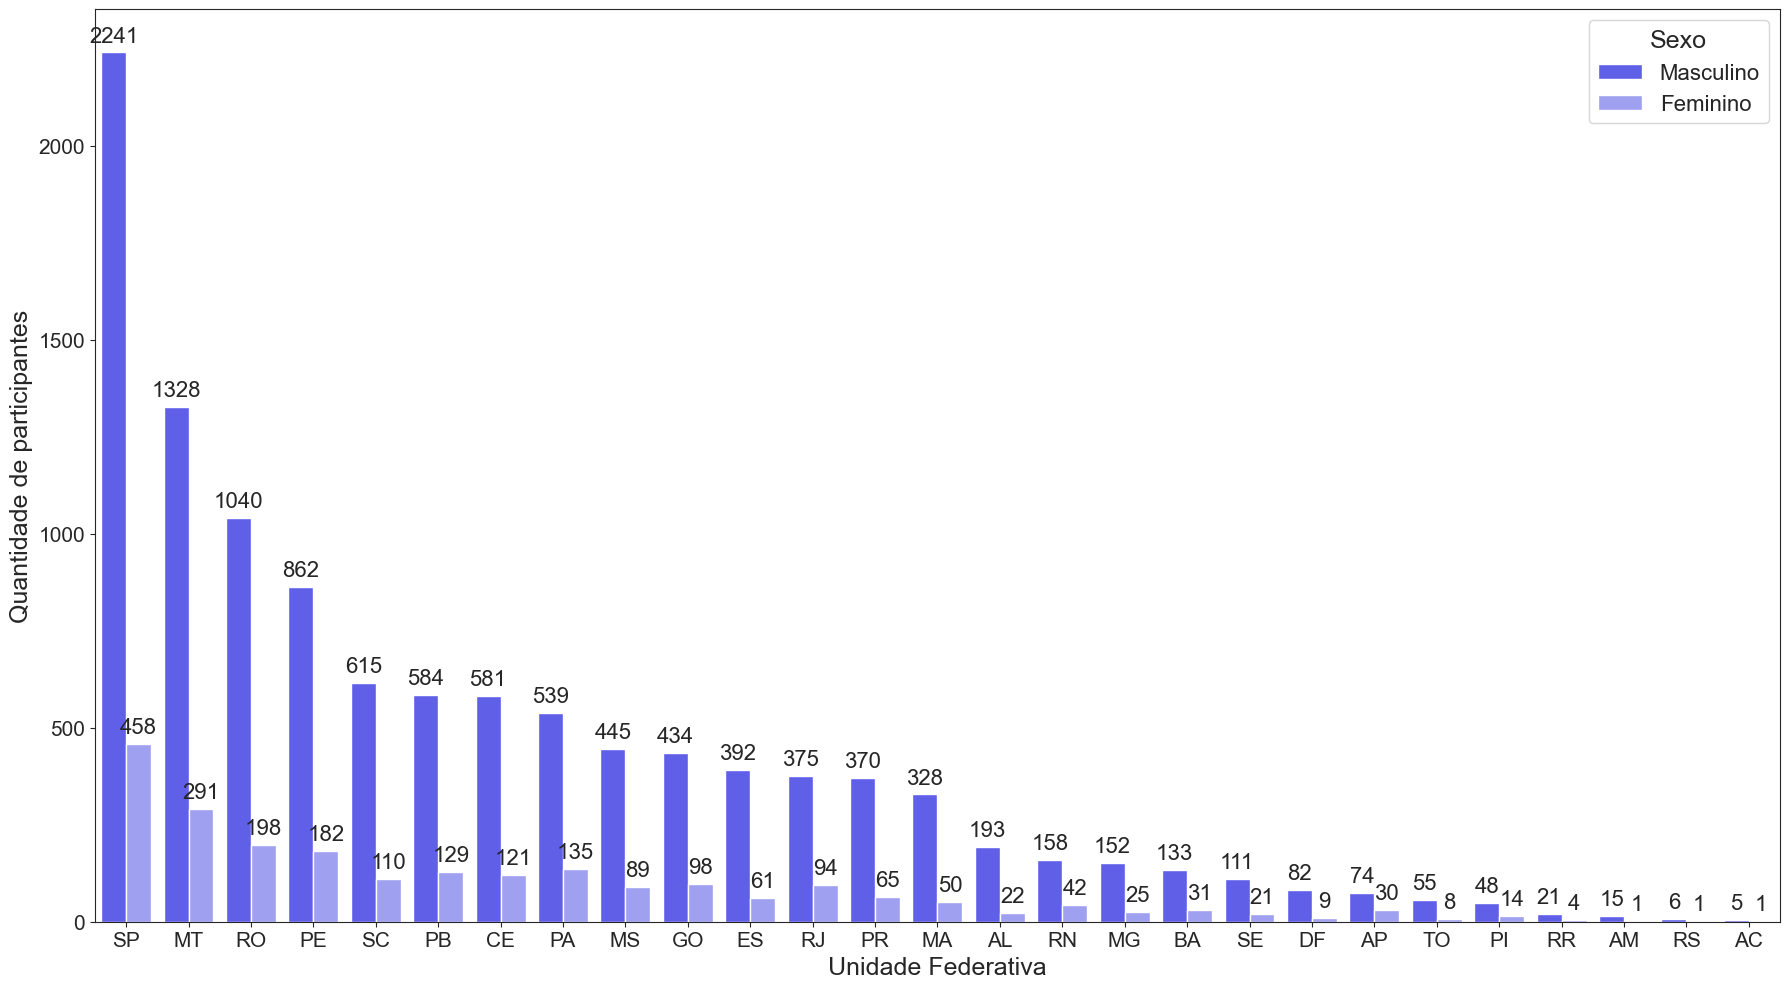

In [49]:
import math
plt.figure(figsize=(18,10))
sns.set_style(style='ticks')

ax = sns.barplot(data=por_sexo_estado.sort_values(['candidatos'], ascending=False),
                 y='candidatos',
                 x='ESTADO',
                 hue='SEXO',)

for p in ax.patches:
    if not math.isnan(p.get_height()):
        ax.annotate(int(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    fontsize=16)

plt.xlabel('Unidade Federativa', fontsize=18)
plt.ylabel('Quantidade de participantes', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
legend = plt.legend(title='Sexo', fontsize=16)
legend.get_title().set_fontsize(18)
plt.tight_layout()  # Melhora a distribuição dos elementos no gráfico
# plt.savefig('imagens/inscritos2.eps', dpi=600, bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


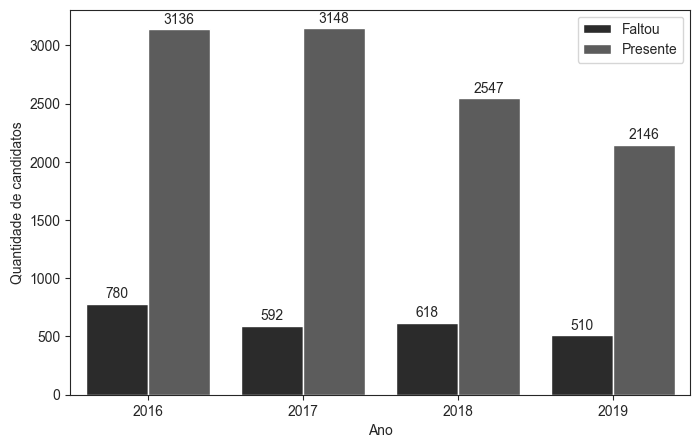

In [14]:
# Agrupar os inscritos por sexo e ano;
counts_presente = dados_poscomp.groupby(['PRESENTE', 'ANO']).size().reset_index(name='counts')

# Renomear os valores de 0's e 1's por Feminino e Masculino
counts_presente['PRESENTE'] = counts_presente['PRESENTE'].replace({'N': 'Faltou', 'S': 'Presente'})

# set plot style: grey grid in the background:
sns.set_style(style="ticks")

sns.set_palette("Greys_r")

# Set the figure size
plt.figure(figsize=(8, 5))

# grouped barplot
ax = sns.barplot(x="ANO", y="counts", hue="PRESENTE", data=counts_presente);

# Add value labels to the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=2)

plt.xlabel('Ano')
plt.ylabel('Quantidade de candidatos')
legend = plt.legend(title='', fontsize=10)
legend.get_title().set_fontsize(10)
plt.savefig('imagens/grafico_porPresença.eps',dpi = 600, bbox_inches='tight')
plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


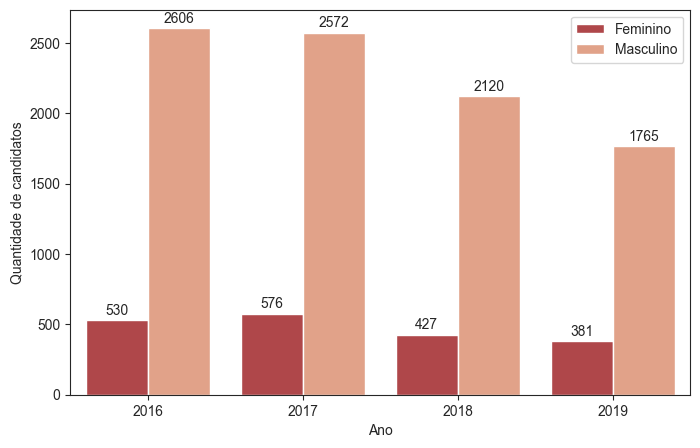

In [34]:
dados_presentes = dados_poscomp.query('PRESENTE == "S"')

# Agrupar os inscritos por sexo e ano;
counts_presente = dados_presentes.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

# Renomear os valores de 0's e 1's por Feminino e Masculino
counts_presente['SEXO'] = counts_presente['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

# set plot style: grey grid in the background:
sns.set_style(style="ticks")

sns.set_palette("RdGy")

# Set the figure size
plt.figure(figsize=(8, 5))

# grouped barplot
ax = sns.barplot(x="ANO", y="counts", hue="SEXO", data=counts_presente);

# Add value labels to the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=2)

plt.xlabel('Ano')
plt.ylabel('Quantidade de candidatos')
legend = plt.legend(title='', fontsize=10)
legend.get_title().set_fontsize(10)
plt.savefig('imagens/grafico_porPresentes.eps',dpi = 600, bbox_inches='tight')
plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


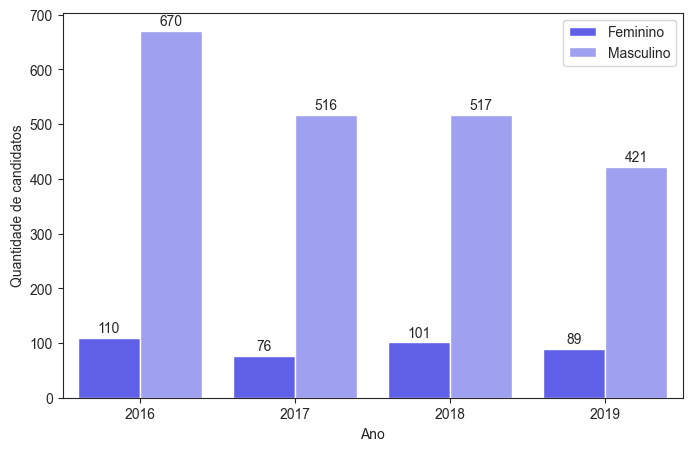

In [44]:
dados_faltantes = dados_poscomp.query('PRESENTE == "N"')

# Agrupar os inscritos por sexo e ano;
counts_faltantes = dados_faltantes.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

# Renomear os valores de 0's e 1's por Feminino e Masculino
counts_faltantes['SEXO'] = counts_faltantes['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

# set plot style: grey grid in the background:
sns.set_style(style="ticks")

sns.set_palette("bwr")

# Set the figure size
plt.figure(figsize=(8, 5))

# grouped barplot
ax = sns.barplot(x="ANO", y="counts", hue="SEXO", data=counts_faltantes);

# Add value labels to the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=2)

plt.xlabel('Ano')
plt.ylabel('Quantidade de candidatos')
legend = plt.legend(title='', fontsize=10)
legend.get_title().set_fontsize(10)
plt.savefig('imagens/grafico_porFaltantes.eps',dpi = 600, bbox_inches='tight')
plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


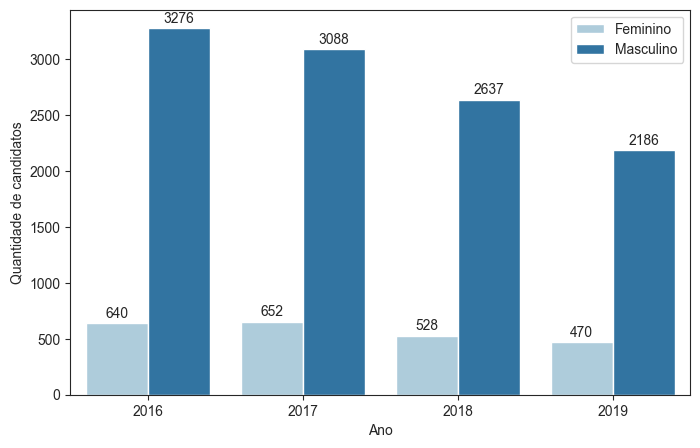

In [17]:
# Agrupar os inscritos por sexo e ano;
counts = dados_poscomp.groupby(['SEXO', 'ANO']).size().reset_index(name='counts')

# Renomear os valores de 0's e 1's por Feminino e Masculino
counts['SEXO'] = counts['SEXO'].replace({0: 'Feminino', 1: 'Masculino'})

# set plot style: grey grid in the background:
sns.set_style(style="ticks")

sns.set_palette("Paired")

# Set the figure size
plt.figure(figsize=(8, 5))

# grouped barplot
ax = sns.barplot(x="ANO", y="counts", hue="SEXO", data=counts)

# Add value labels to the bars
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10, padding=2)

plt.xlabel('Ano');
plt.ylabel('Quantidade de candidatos');
legend = plt.legend(title='', fontsize=10)
legend.get_title().set_fontsize(18)
plt.savefig('imagens/grafico_porSexo.eps',dpi = 600, bbox_inches='tight')
plt.show()

In [18]:
dados_poscomp.query('ESPECIALIDADE == "sistemas de computação" and SEXO == 0')

,SEXO,ESTADO,REGIAO,IDADE,ESPECIALIDADE,PRESENTE,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO,matematica,fundamentos_computacao,tecnologia_computacao
INSCRICAO,,,,,,,,,,,,,,,,,,,,,
39401685041-2,0,24,3,41,sistemas de computação,N,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,0.0,0.0,0.0
39401657015-4,0,12,3,31,sistemas de computação,N,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,0.0,0.0,0.0
39401682747-4,0,14,1,33,sistemas de computação,N,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,0.0,0.0,0.0
39401654446-9,0,14,1,27,sistemas de computação,S,0,3.0,2.0,1.0,...,2.0,1.0,2.0,0.0,2.0,0.0,2016,9.0,14.0,8.0
39401656777-8,0,17,1,29,sistemas de computação,S,0,0.0,2.0,1.0,...,2.0,1.0,2.0,0.0,1.0,1.0,2016,5.0,10.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51801382621-3,0,8,2,29,sistemas de computação,S,0,2.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,2019,5.0,15.0,6.0
51801390077-3,0,10,2,27,sistemas de computação,S,0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2019,3.0,8.0,4.0
51801354048-2,0,17,1,34,sistemas de computação,N,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,0.0,0.0,0.0


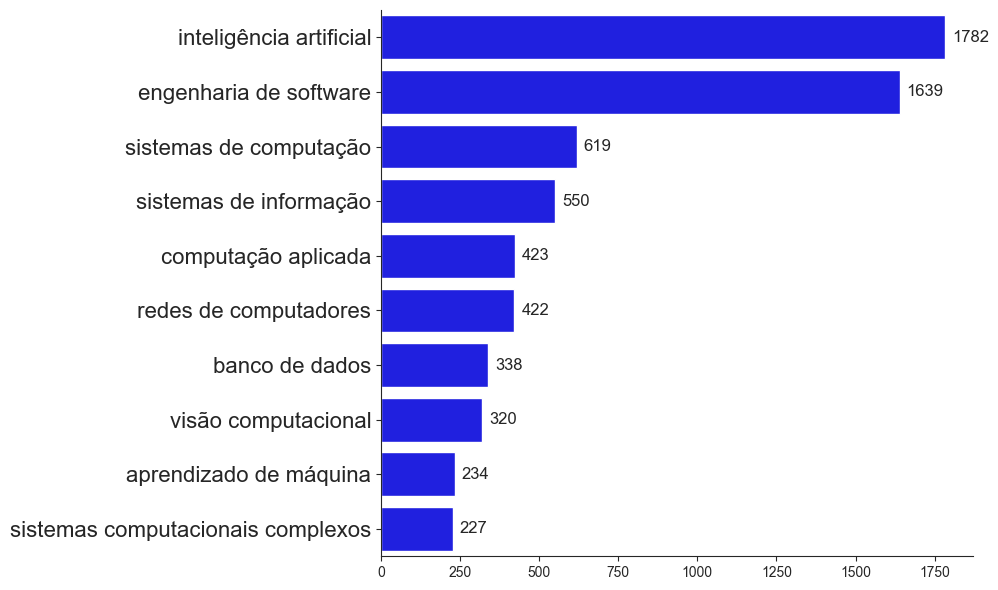

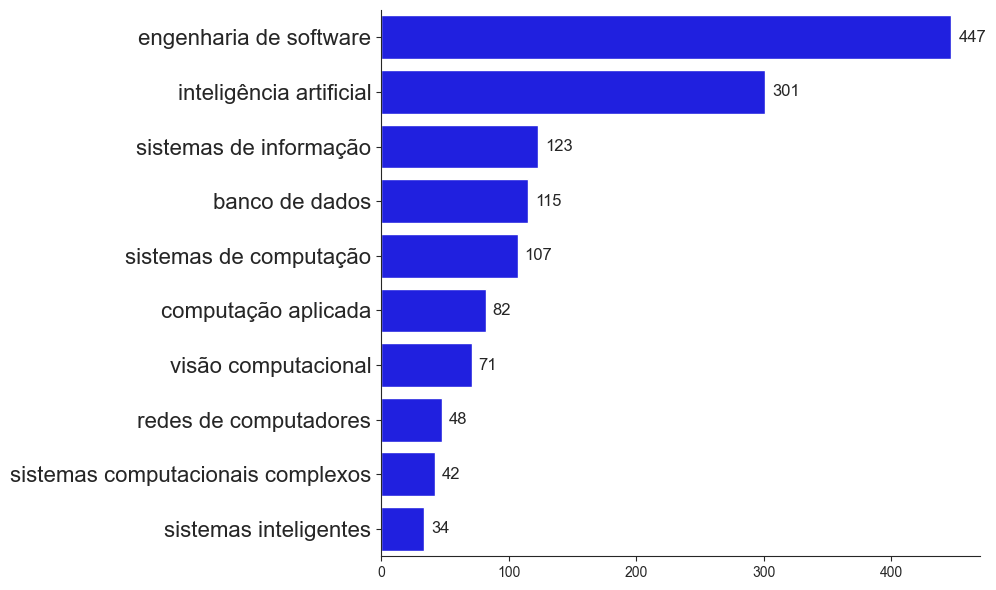

In [56]:

def plot_top_especialidades_por_sexo(data, sexo, top_n=10, save_path=None):
    # Mapear as letras 'M' e 'F' para os nomes completos dos gêneros
    genero_map = {1: 'Masculino', 0: 'Feminino'}
    
    # Filtrar os dados pelo sexo especificado
    data_sexo = data[data['SEXO'] == sexo]

    # Calcular as contagens para cada especialidade
    counts_esp = data_sexo['ESPECIALIDADE'].value_counts().reset_index()
    counts_esp.columns = ['ESPECIALIDADE', 'counts']

    # Selecionar as top_n especialidades com maior contagem
    top_especialidades = counts_esp.head(top_n)

    # Configurar o tamanho da figura
    plt.figure(figsize=(10, 6))

    # Gráfico de barras
    sns.barplot(data=top_especialidades, x='counts', y='ESPECIALIDADE', color='blue')

    # Adicionar os valores das barras
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                           ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=12)

    # Configurar os rótulos e títulos
    plt.xlabel('')
    plt.yticks(fontsize=16)
    plt.ylabel('')
    plt.tight_layout()  # Melhora a distribuição dos elementos no gráfico
    # Substituir a letra do sexo pelo nome completo do gênero
    # plt.title(f'Top {top_n} Especialidades - {genero_map.get(sexo, "Desconhecido")}')
    sns.despine()
    
    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')
        
    plt.show()

# Exemplo de uso do método
plot_top_especialidades_por_sexo(dados_poscomp, 1, top_n=10, save_path='imagens/espec_masculino.eps')
plot_top_especialidades_por_sexo(dados_poscomp, 0, top_n=10, save_path='imagens/espec_feminino.eps')


In [20]:
media_hist = dados_poscomp.query('PRESENTE == "S"')

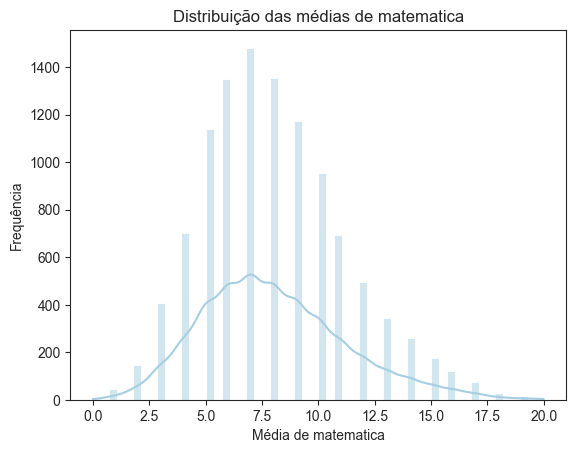

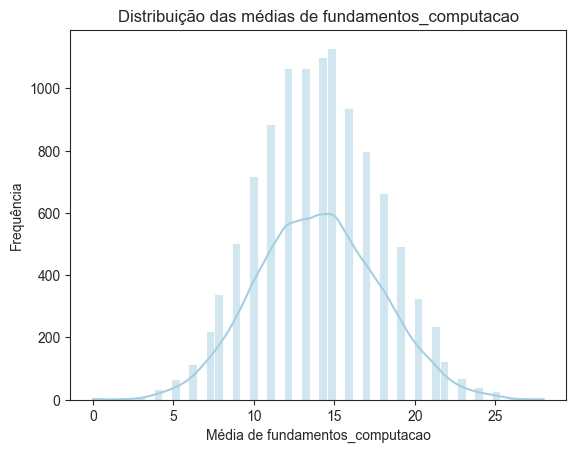

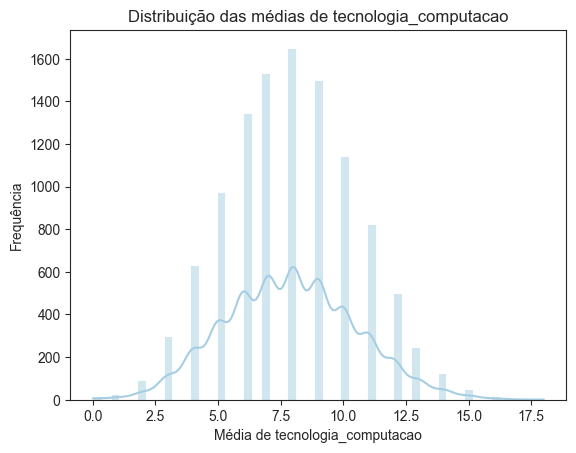

In [21]:
def plot_histogram(dataset, columns):
    for column in columns:
        sns.histplot(dataset[column], kde=True)
        plt.xlabel(f'Média de {column}')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição das médias de {column}')
        plt.show()

# Exemplo de uso
columns = ['matematica', 'fundamentos_computacao', 'tecnologia_computacao']
plot_histogram(media_hist, columns)

In [22]:
dados_poscomp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13477 entries, 39401645886-1 to 51801366900-3
Data columns (total 36 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   SEXO                                             13477 non-null  int64  
 1   ESTADO                                           13477 non-null  int64  
 2   REGIAO                                           13477 non-null  int64  
 3   IDADE                                            13477 non-null  int64  
 4   ESPECIALIDADE                                    13477 non-null  object 
 5   PRESENTE                                         13477 non-null  object 
 6   CARGO                                            13477 non-null  int64  
 7   Matemática Discreta                              10977 non-null  float64
 8   Cálculo Diferencial e Integral                   10977 non-null  float64
 9   Álgebra Linea

In [23]:
# # Agrupar os dados por ano e cluster, e calcular a média para cada atributo
# data_grouped = dados_poscomp.groupby(['ANO', 'cluster']).mean()

# # Criar um gráfico de linha para cada atributo
# attributes = dados_poscomp.iloc[:,7:32]

# for attribute in attributes:
#     # Extrair os valores de desempenho médio para cada ano e cluster
#     values = data_grouped.loc[:, attribute]

#     # Criar um gráfico de linha para o atributo
#     plt.figure()
#     for cluster in range(num_clusters):
#         cluster_values = values.loc[:, cluster]
#         plt.plot(cluster_values.index, cluster_values.values, label=f'Cluster {cluster}')

#     plt.xlabel('Ano')
#     plt.ylabel('Desempenho Médio')
#     plt.title(f'Desempenho dos Candidatos por Ano - {attribute}')
#     plt.legend()
#     plt.show()

In [24]:
# dados_poscomp.to_csv('dados/df_poscomp.csv', index=False)